In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player_wins = 0
games_played = 0
options = ['hit', 'stand']

total_random_wins = []
total_15_wins = []
total_16_wins = []
total_17_wins = []
total_18_wins = []

In [3]:
# cards
suits = ["Spades", "Hearts", "Clubs", "Diamonds"]
cards = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
cards_values = {"A": 11, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "J":10, "Q":10, "K":10}

# suit value 
suits_values = {"Spades":"\u2664", "Hearts":"\u2661", "Clubs": "\u2667", "Diamonds": "\u2662"}

class Card: 
    def __init__(self, suit, value, card_value):
        self.suit = suit
        self.value = value
        self.card_value = card_value
    

In [4]:
deck = []
def shuffle_deck():
    # The deck of cards
    global deck
    deck = []

    for suit in suits: # Loop for every type of suit
        for card in cards: # Loop for every type of card in a suit
            # Adding card to the deck
            deck.append(Card(suits_values[suit], card, cards_values[card]))

In [5]:
def reset_score():
    global player_wins
    global games_played 
    
    games_played = 0
    player_wins = 0

In [6]:
# RANDOM POLICY == 0
def random_policy():
    return random.choice(options)

# TABLE POLICY == 1
def table_policy(score, table_score):
    if score < table_score:
        return 'hit'
    else:
        return 'stand'
    
# Q POLICY == 2
def q_policy(score):
    return choose_action(score, .1)

## Table Policy

| | State | Action Case 15| Action Case 16| Action Case 17|Action Case 18
| --- | --- | --- | --- | --- | --- |
| 1  | 1  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 2  | 2  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 3  | 3  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 4  | 4  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 5  | 5  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 6  | 6  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 7  | 7  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 8  | 8  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 9  | 9  | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 10 | 10 | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 11 | 11 | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 12 | 12 | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 13 | 13 | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 14 | 14 | 'Hit' | 'Hit' | 'Hit' | 'Hit' | 'Hit' |
| 15 | 15 | 'Stand' | 'Hit' |'Hit' |'Hit' |
| 16 | 16 | 'Stand' | 'Stand' |'Hit' |'Hit' |
| 17 | 17 | 'Stand' | 'Stand' |'Stand' |'Hit' |
| 18 | 18 | 'Stand' | 'Stand' |'Stand' |'Stand' |
| 19 | 19 | 'Stand' | 'Stand' |'Stand' |'Stand' |
| 20 | 20 | 'Stand' | 'Stand' |'Stand' |'Stand' |
| 21 | 21 | 'Stand' | 'Stand' |'Stand' |'Stand' |
| 22 | Win |'Stand' | 'Stand' | 'Stand' |'Stand' |
| 23 | Loss/Bust |'Stand' |'Stand' | 'Stand' |'Stand' |

In [7]:
# Function for a single game of blackjack
def blackjack_game(deck, policy, table_score):
    
    global player_wins
    global cards_values
    global games_played
    
    games_played += 1
    
    player_cards = []
    dealer_cards = []
    
    player_score = 0
    dealer_score = 0
    
    
    # ======= DEALER'S HAND FIRST ======= #
   
    # DEALING DEALER'S HAND
    while len (dealer_cards) < 2:          
        dealer_card = random.choice(deck)
        dealer_cards.append(dealer_card)
        deck.remove(dealer_card)
        dealer_score += dealer_card.card_value
        
    # DEALER: if both cards are aces, make an ace == 1 
    if len(dealer_cards) == 2:
        if dealer_cards[0].card_value == 11 and dealer_cards[1].card_value == 11:
            dealer_cards[1].card_value = 1
            dealer_score -= 10
        
    # LOOP FOR DEALER TO GET MORE CARDS
    while dealer_score < 21:
        dealer_card = random.choice(deck)
        predicted_value = dealer_card.card_value + dealer_score

        if predicted_value > 21 and dealer_card.card_value == 11:
            predicted_value -=10
        
        if predicted_value > 21:
            break
        else:
            dealer_score = predicted_value  
            
    # ======= DEALER'S HAND END ======= #   
        
    # ======= PLAYER'S HAND SECOND ======= #
    
    # DEALING PLAYER'S HAND
    while len (player_cards) < 2:    
        player_card = random.choice(deck)
        player_cards.append(player_card)
        deck.remove(player_card)
        player_score += player_card.card_value      
    
    # PLAYER: if both cards are aces, make an ace == 1 
    if len(player_cards) == 2:
        if player_cards[0].card_value == 11 and player_cards[1].card_value == 11:
            player_cards[0].card_value = 1
            player_score -= 10
            
    # determine player win with 2 cards
    if player_score == 21:
        player_wins += 1
        # updating q_table 
        if policy == 2:
            update_q_table('21', choice, 'win')
        return
    
    
    # LOOP FOR PLAYER TO GET MORE CARDS
    while player_score < 21:
        
        if policy == 0:
            choice = random_policy()
        elif policy == 1:
            choice = table_policy(player_score, table_score)
        elif policy == 2:
            choice = q_policy(player_score)
            
        prev_score = player_score
        
        if choice == 'hit':
            # deal another new card
            player_card = random.choice(deck)
            player_cards.append(player_card)
            deck.remove(player_card)
 
            # Updating player score   
            player_score += player_card.card_value
            
            # if the player "busts" but has an ace, convert
            c = 0
            while player_score > 21 and c < len(player_cards):
                if player_cards[c].card_value == 11:
                    player_cards[c].card_value = 1
                    player_score -= 10
                    c += 1
                else:
                    c += 1 
            
            # updating q_table 
            if policy == 2 and player_score <= 21:
                update_q_table(str(prev_score), choice, str(player_score))
            
        elif choice == 'stand':
            break
            
        
                
    # ======= PLAYER'S HAND END ======= #
    
    # ======= CHECK WINNING SCORE ======= #
    
    if player_score == 21: # check player blackjack
        player_wins += 1
        result = 'win'
    
    #elif player_score > 21:  # check player bust
    elif player_score >= dealer_score and player_score < 21:
        player_wins += 1
        result = 'win'
    
    elif dealer_score > 21:
        player_wins += 1
        result = 'win'
    #print("player score: " , player_score)
    #print("dealeer score: " , dealer_score)
    
    result = 'loss'
    
    # updating q_table 
    if policy == 2:
        update_q_table(result, choice, result)
    return 

In [8]:
for k in range(0, 10):
    # RANDOM OPTION
    reset_score()
    for i in range(0, 10000):
        shuffle_deck()
        blackjack_game(deck, 0, 0)
    total_random_wins.append(player_wins)
    
    # TABLE POLICY < 15
    reset_score()
    for i in range(0, 10000):
        shuffle_deck()
        blackjack_game(deck, 1, 15)
    total_15_wins.append(player_wins)

    # TABLE POLICY < 16
    reset_score()
    for i in range(0, 10000):
        shuffle_deck()
        blackjack_game(deck, 1, 16)
    total_16_wins.append(player_wins)

    # TABLE POLICY < 17
    reset_score()
    for i in range(0, 10000):
        shuffle_deck()
        blackjack_game(deck, 1, 17)
    total_17_wins.append(player_wins)
    
    # TABLE POLICY < 18
    reset_score()
    for i in range(0, 10000):
        shuffle_deck()
        blackjack_game(deck, 1, 18)
    total_18_wins
    total_18_wins.append(player_wins)

In [9]:
data = {'Random': np.average(total_random_wins), 
        '< 15': np.average(total_15_wins),
        '< 16': np.average(total_16_wins),
        '< 17': np.average(total_17_wins),
        '< 18': np.average(total_18_wins)
       }
policy = list(data.keys())
values = list(data.values())

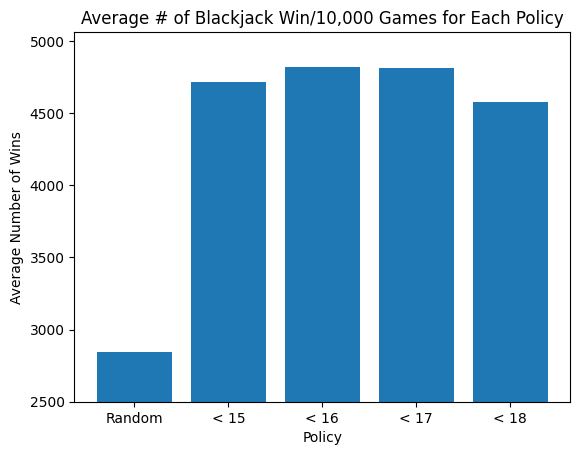

In [10]:
plt.bar(policy, values)
plt.title("Average # of Blackjack Win/10,000 Games for Each Policy")
plt.xlabel("Policy")
plt.ylabel("Average Number of Wins")
plt.ylim(2500)
plt.show()

# Implementing Q Learning

def choose_action(current_state, q_value):
    
    t = np.random.uniform() # draw a random number
    
    if t >= epsilon # if that number is large enough...
        max_q = -10000.0 # initiate the current best q-value
        a = 'Hit' # set an initial action to be hit
        #use .1 for epi, lambda, and alpha

## Q Table
| State | Action | Q-Value |



In [11]:
# Creating Q-Table
# 23 rows: 1 for each state, 3 columns for state, action, q-value
def init_q_table():
    global q_table 
    q_table = {'win':{'stand':1000},
               'loss':{'stand':-1000},
               '1':{'hit':0,'stand':0},
               '2':{'hit':0,'stand':0},
               '3':{'hit':0,'stand':0},
               '4':{'hit':0,'stand':0},
               '5':{'hit':0,'stand':0},
               '6':{'hit':0,'stand':0},
               '7':{'hit':0,'stand':0},
               '8':{'hit':0,'stand':0},
               '9':{'hit':0,'stand':0},
               '10':{'hit':0,'stand':0},
               '11':{'hit':0,'stand':0},
               '12':{'hit':0,'stand':0},
               '13':{'hit':0,'stand':0},
               '14':{'hit':0,'stand':0},
               '15':{'hit':0,'stand':0},
               '16':{'hit':0,'stand':0},
               '17':{'hit':0,'stand':0},
               '18':{'hit':0,'stand':0},
               '19':{'hit':0,'stand':0},
               '20':{'hit':0,'stand':0},
               '21':{'hit':0,'stand':0},
              }

## Rewards Table

In [12]:
def rewards(current_state):
    if current_state == 'win':
        return 1000
    elif current_state == 'loss':
        return -1000
    return

## Action Selection

In [13]:
def choose_action(current_state, epi):
    t = np.random.uniform()
    
    if t < epi:
        #randomly choose from all possible actions
        action = random_policy()  
    if t >= epi:
        #action with highest q value for current state
        hit = q_table[str(current_state)]['hit']
        stand = q_table[str(current_state)]['stand']
        action = hit if hit > stand else stand
        
    return action

In [14]:
def update_q_table(current_state, action, next_state):
    global q_table
    #= (1-.1)  q[s,a] + .1(r(s) + .1q[s',a']) 
   
    max_q_next = max(q_table[next_state].values())  #find the max q value for next state
    qval_current = (1-.1) * q_table[current_state][action] # q_value for current state
    qval_next = .1 * (rewards(current_state) + .1 * (max_q_next)) # rewards + max q_value for next state
    
    q_table[current_state][action] = qval_current + qval_next

## Optimize Policy 

In [15]:
def optimize_policy():
    # init q-table with q-values of 0
    init_q_table()
    reset_score()
    for i in range(0, 100):
        shuffle_deck()
        blackjack_game(deck, 2, 0)
        
        
def construct_policy(q_table):
    print("hi")
    #for each state s:
        #find action a with the largest q-value
        #add s, a to the policy table

In [16]:
optimize_policy()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'